In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/give-me-some-credit/Data Dictionary.xls
/kaggle/input/give-me-some-credit/cs-training.csv
/kaggle/input/give-me-some-credit/sampleEntry.csv
/kaggle/input/give-me-some-credit/cs-test.csv


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import altair as alt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [5]:
# Load the dataset
df = pd.read_csv('/kaggle/input/give-me-some-credit/cs-training.csv')

# 1. Basic Overview
print(df.info())
print(df.describe())
print("Missing Values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [6]:
# 2. Handle Missing Values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df.iloc[:, 1:] = imputer.fit_transform(df.iloc[:, 1:])

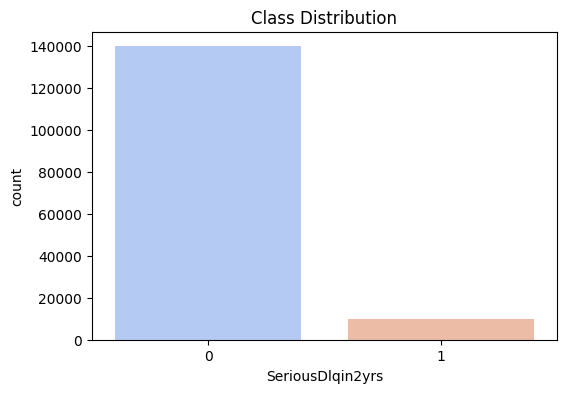

In [7]:
# 3. Visualizing Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='SeriousDlqin2yrs', data=df, palette='coolwarm')
plt.title('Class Distribution')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


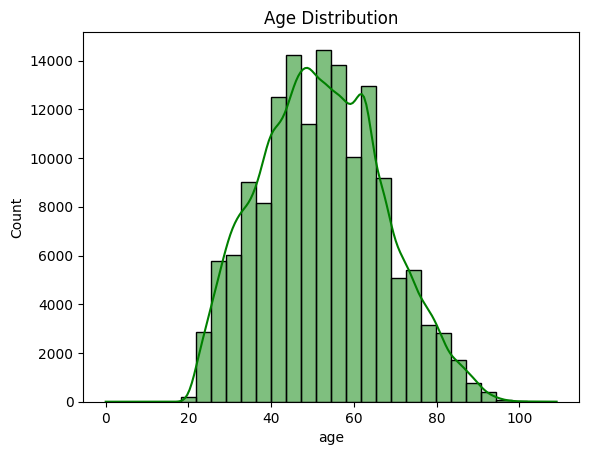

In [8]:
# 4. Age Distribution (Seaborn)
sns.histplot(df['age'], kde=True, bins=30, color='green')
plt.title('Age Distribution')
plt.show()

In [11]:
# 5. Monthly Income Distribution (Plotly)
fig = px.histogram(df, x='MonthlyIncome', nbins=50, title='Monthly Income Distribution')
fig.show()

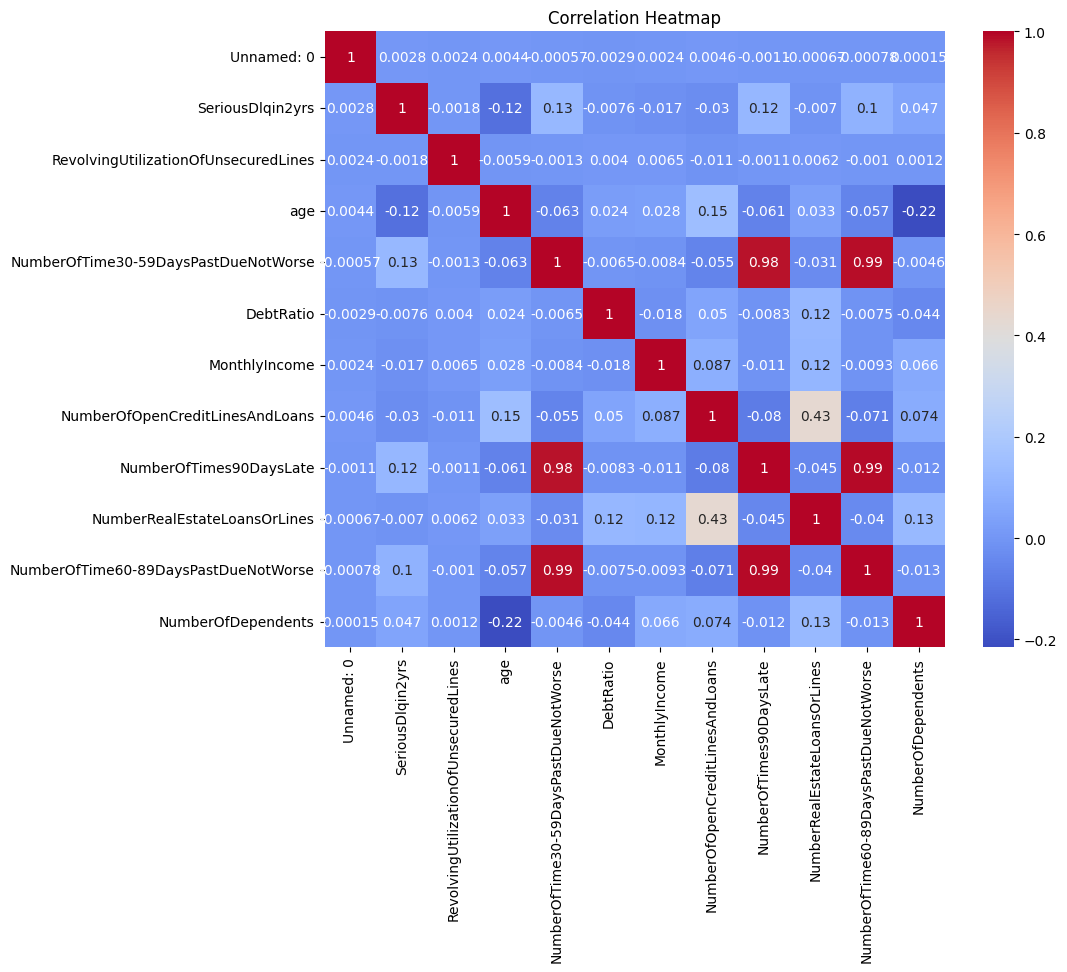

In [12]:
# 6. Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [13]:
# 7. Altair Interactive Scatterplot
alt_chart = alt.Chart(df.sample(5000)).mark_circle(size=60).encode(
    x='DebtRatio',
    y='MonthlyIncome',
    color='SeriousDlqin2yrs:N',
    tooltip=['age', 'NumberOfDependents']
).interactive()
alt_chart.show()

alt.Chart(...)

In [25]:
df

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


<Axes: title={'center': 'SeriousDlqin2yrs'}, ylabel='count'>

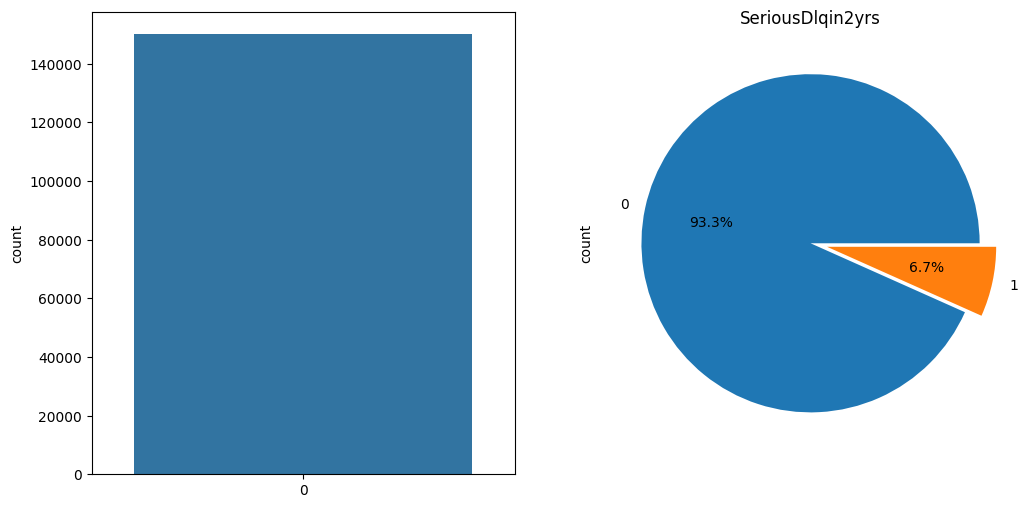

In [27]:
target_count = df["SeriousDlqin2yrs"].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(df["SeriousDlqin2yrs"], ax=axes[0])
axes[1].set_title("SeriousDlqin2yrs")
target_count.plot.pie(explode=[0, 0.1], autopct='%1.1f%%',ax=axes[1])

In [29]:
X = df.drop(['SeriousDlqin2yrs'], axis=1)
y = df['SeriousDlqin2yrs']

In [34]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [39]:
# Handle class imbalance
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X_res, y_res = SMOTE(random_state=42).fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [ ]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}
params = {
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [10, 20]},
    'Gradient Boosting': {'learning_rate': [0.01, 0.1], 'n_estimators': [100, 200]},
    'XGBoost': {'max_depth': [3, 5], 'learning_rate': [0.01, 0.1]}
}

for name, model in models.items():
    grid = GridSearchCV(model, params[name], cv=3, scoring='roc_auc')
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    predictions = best_model.predict(X_test)
    print(f"{name} Best Parameters: {grid.best_params_}")
    print(f"{name} ROC AUC Score: {roc_auc_score(y_test, predictions)}")
    print(f"{name} Classification Report:\n{classification_report(y_test, predictions)}")

Random Forest Best Parameters: {'max_depth': 20, 'n_estimators': 200}
Random Forest ROC AUC Score: 0.9040910047370586
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90     41838
           1       0.91      0.90      0.90     42147

    accuracy                           0.90     83985
   macro avg       0.90      0.90      0.90     83985
weighted avg       0.90      0.90      0.90     83985

